In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


# Cins və yaş qrupları üzrə ölənlərin sayı (Şəhər və kənd)

In [10]:
def process_dataframe_4_1(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 6, 8], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)

    df_new.rename(columns={0: '0 yaş'}, inplace=True)
    
    return df_new

In [11]:
cins_yas_say = pd.read_excel('Cins və yaş qrupları üzrə ölənlərin sayı.xls',sheet_name = '4_1')

In [12]:
cins_yas_say_pro = process_dataframe_4_1(cins_yas_say)

In [13]:
cins_yas_say_pro

Unnamed: 1    İl   Cəmi  0 yaş   1-4  5-9  10-14  15-19  20-24  25-29  30-34  \
0           2005  27474    893   336  255    223    320    404    451    662   
1           2009  27710    950   277  133    135    305    396    400    510   
2           1991  20461   2103  1342  202    100    129    234    283    338   
3           2010  25332    825   211   90     82    145    217    215    256   
4           1998  46299   2061  2052  531    339    513    713    779   1089   
..           ...    ...    ...   ...  ...    ...    ...    ...    ...    ...   
97          2012  25529    849   221   62     47    139    177    222    260   
98          2022  27653    438   119  105     85    128    148    196    255   
99          1992  28598   2609  1568  268    258   1012   1502   1178   1273   
100         2009  24804    781   193  106     87    147    186    224    240   
101         2016  56648   1666   426  229    174    363    581    587    645   

Unnamed: 1  ...  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  \
0           ...   1721   1801   1848   1817   4274   4289   3601   1414   
1           ...   1748   2201   2211   1913   2551   4607   4052   2541   
2           ...    268    941   1311   1725   1554   1597   2253   2253   
3           ...    846   1184   1305   1448   1547   4349   4655   3817   
4           ...   1732   1441   3058   5636   6712   5481   3406   2815   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
97          ...    856   1225   1431   1620   1263   3577   4794   4231   
98          ...    574   1034   1709   2730   3163   3309   2185   4738   
99          ...    720   1773   2795   3338   2283   1490   1451   1423   
100         ...    850   1159   1223   1177   1898   4421   4520   3417   
101         ...   1955   3464   5010   5357   5264   3874   9180   8616   

Unnamed: 1  85 və yuxarı       Cins  
0                   1046       Kişi  
1                   1143       Kişi  
2                   3245      Qadın  
3                   3333      Qadın  
4                   5063  Hər ikisi  
..                   ...        ...  
97                  3757      Qadın  
98                  6003      Qadın  
99                  1708       Kişi  
100                 3306      Qadın  
101                 7305  Hər ikisi  

[102 rows x 22 columns]

In [14]:
cins_yas_say_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   İl            102 non-null    int32 
 1   Cəmi          102 non-null    int32 
 2   0 yaş         102 non-null    int32 
 3   1-4           102 non-null    int32 
 4   5-9           102 non-null    int32 
 5   10-14         102 non-null    int32 
 6   15-19         102 non-null    int32 
 7   20-24         102 non-null    int32 
 8   25-29         102 non-null    int32 
 9   30-34         102 non-null    int32 
 10  35-39         102 non-null    int32 
 11  40-44         102 non-null    int32 
 12  45-49         102 non-null    int32 
 13  50-54         102 non-null    int32 
 14  55-59         102 non-null    int32 
 15  60-64         102 non-null    int32 
 16  65-69         102 non-null    int32 
 17  70-74         102 non-null    int32 
 18  75-79         102 non-null    int32 
 19  80-84   

# Cins və yaş qrupları üzrə ölənlərin sayı (Şəhər)

In [15]:
cins_yas_say_seher = pd.read_excel('Cins və yaş qrupları üzrə ölənlərin sayı.xls',sheet_name = '4_1sheher')

In [16]:
cins_yas_say_seher_pro = process_dataframe_4_1(cins_yas_say_seher)

In [17]:
cins_yas_say_seher_pro

Unnamed: 1    İl   Cəmi  0 yaş  1-4  5-9  10-14  15-19  20-24  25-29  30-34  \
0           2006  27581   1082  174   92    119    251    305    351    433   
1           2018  14152    490   44   56     34     50     78     99    109   
2           2008  27817   1047  160   73    114    218    288    351    409   
3           1993  27185   1859  601  180    141    500    742    707    888   
4           2011  28567   1536  135   84     89    209    329    384    442   
..           ...    ...    ...  ...  ...    ...    ...    ...    ...    ...   
97          1997  13251    630  319  111     87    158    300    281    438   
98          2017  14103    582   80   56     45     52     89    114    141   
99          1997  23928   1062  552  188    132    239    403    423    611   
100         1999  22828    780  418  183    133    205    308    352    520   
101         2003  13280    434   37   85     86    139    202    241    287   

Unnamed: 1  ...  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  \
0           ...   1492   1771   1956   1607   3705   4194   3929   2454   
1           ...    274    549    991   1347   1511   1264   2036   2495   
2           ...   1577   1907   2251   1801   2975   4401   4014   2823   
3           ...    735   1476   2456   3051   3084   2064   2127   2501   
4           ...   1395   2156   2431   2454   1817   4287   4028   3171   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
97          ...    763    629   1375   1845   1905   1368    655    558   
98          ...    331    613   1029   1299   1530   1067   2340   2314   
99          ...   1083    892   2114   2898   3232   2799   1770   1695   
100         ...   1084    969   1472   2909   3260   3185   2060   1398   
101         ...    871    972    776   1425   2113   2028   1395    544   

Unnamed: 1  85 və yuxarı       Cins  
0                   2041  Hər ikisi  
1                   2416      Qadın  
2                   1887  Hər ikisi  
3                   2362  Hər ikisi  
4                   2314  Hər ikisi  
..                   ...        ...  
97                   554       Kişi  
98                  2065      Qadın  
99                  2057  Hər ikisi  
100                 1884  Hər ikisi  
101                  484       Kişi  

[102 rows x 22 columns]

# Cins və yaş qrupları üzrə ölənlərin sayı (Kənd)

In [18]:
cins_yas_say_kend = pd.read_excel('Cins və yaş qrupları üzrə ölənlərin sayı.xls',sheet_name = '4_1kend')

In [19]:
cins_yas_say_kend_pro = process_dataframe_4_1(cins_yas_say_kend)

In [20]:
cins_yas_say_kend_pro

Unnamed: 1    İl   Cəmi  0 yaş   1-4  5-9  10-14  15-19  20-24  25-29  30-34  \
0           2005  24615    800   512  238    208    219    282    325    418   
1           2019  13135    259    77   60     57    106    148    176    205   
2           1990   9962   1131  1215  113     53     62    103    140    142   
3           2022  12469    212    52   41     40     62     81    111    118   
4           2009  12111    340   129   68     49     78     92    107    112   
..           ...    ...    ...   ...  ...    ...    ...    ...    ...    ...   
97          2005  12652    429   285  148    117    147    187    203    266   
98          2011  25195    367   269  124    107    217    297    335    385   
99          2023  14169    431    90   77     79    175    255    220    241   
100         2007  13304    355   242   63     99    181    234    211    324   
101         1995  11645    910   973  167    110    101    149    200    216   

Unnamed: 1  ...  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  \
0           ...   1003   1038    922   1215   3607   4174   3794   1986   
1           ...    566    869   1391   1593   1383    958   1161   1991   
2           ...    130    477    588    668    561    609    857    836   
3           ...    281    463    724   1125   1194   1248    917   2229   
4           ...    362    462    463    428    849   2276   2360   1686   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
97          ...    626    665    624    706   2022   2228   1871    745   
98          ...   1089   1511   1517   1488   1315   4028   4603   3723   
99          ...    524    852   1406   2025   1899   1440    862   1221   
100         ...    736    727    784    569   1652   2396   2207    992   
101         ...    165    221    721   1009   1169    827    855   1014   

Unnamed: 1  85 və yuxarı       Cins  
0                   2568  Hər ikisi  
1                   1569       Kişi  
2                   2056      Qadın  
3                   3256      Qadın  
4                   1844      Qadın  
..                   ...        ...  
97                   567       Kişi  
98                  2687  Hər ikisi  
99                  1759       Kişi  
100                  620       Kişi  
101                 2461      Qadın  

[102 rows x 22 columns]

# Cins və yaş qrupları üzrə ölümün ümumi əmsalları (Şəhər və Kənd)

In [21]:
import numpy as np

def process_dataframe_4_2(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 6, 8, 28, 29, 30], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(float).round(1)
    df_new['İl'] = df_new['İl'].astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    return df_new


In [22]:
cins_yas_emsal = pd.read_excel('Cins və yaş qrupları üzrə ölümün ümumi əmsalları.xls',sheet_name = '4_2')

In [23]:
cins_yas_emsal_pro = process_dataframe_4_2(cins_yas_emsal)

In [24]:
cins_yas_emsal_pro

Unnamed: 1    İl  Cəmi   01)  1-4  5-9  10-14  15-19  20-24  25-29  30-34  \
0           2017   5.9  11.1  0.5  0.3    0.3    0.5    0.6    0.7    0.8   
1           2016   5.9  11.4  0.6  0.3    0.3    0.5    0.7    0.6    0.8   
2           1992   6.1  24.0  3.7  0.5    0.4    0.6    0.9    1.0    1.4   
3           1992   8.1  27.8  4.2  0.6    0.7    3.0    4.2    3.6    4.0   
4           2020   8.5  10.9  0.4  0.3    0.3    1.9    3.6    2.8    1.9   
..           ...   ...   ...  ...  ...    ...    ...    ...    ...    ...   
97          2013   6.3  11.1  0.6  0.4    0.3    0.6    0.9    1.1    1.3   
98          2012   5.5  10.5  0.8  0.2    0.2    0.4    0.4    0.5    0.7   
99          2021   7.7   7.5  0.6  0.3    0.3    0.6    0.8    0.9    1.0   
100         2019   6.1  12.7  0.5  0.3    0.3    0.6    0.9    0.9    1.1   
101         2004   6.4  15.4  1.8  0.5    0.4    0.6    1.0    1.3    2.1   

Unnamed: 1  ...  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  \
0           ...    3.2    5.4    8.5   14.4   22.9   33.8   61.9   99.6   
1           ...    3.0    5.3    8.4   14.6   22.7   36.8   62.7  106.5   
2           ...    3.1    5.5    9.3   15.7   22.1   34.3   56.5   81.7   
3           ...    8.6   12.4   19.2   29.3   37.6   58.7   82.4  108.6   
4           ...    5.5    8.8   15.3   23.6   35.1   49.2   88.9  124.0   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
97          ...    5.1    8.0   12.6   20.5   27.8   51.5   76.6  113.7   
98          ...    2.5    3.7    6.4   10.9   17.5   36.0   61.1  104.0   
99          ...    4.2    6.8   11.3   18.0   28.1   42.8   72.6  129.4   
100         ...    4.6    6.8   11.4   17.2   24.8   34.1   72.7   97.0   
101         ...    5.8    9.3   14.9   27.3   39.3   58.5   87.7  120.8   

Unnamed: 1  85 və yuxarı       Cins  
0                  152.4  Hər ikisi  
1                  165.8  Hər ikisi  
2                  128.3      Qadın  
3                  167.5       Kişi  
4                  180.8       Kişi  
..                   ...        ...  
97                 158.5       Kişi  
98                 180.9      Qadın  
99                 186.0  Hər ikisi  
100                140.5       Kişi  
101                227.8       Kişi  

[102 rows x 22 columns]

# Cins və yaş qrupları üzrə ölümün ümumi əmsalları (Şəhər)

In [25]:
cins_yas_emsal_seher = pd.read_excel('Cins və yaş qrupları üzrə ölümün ümumi əmsalları.xls',sheet_name = '4_2sheher')

In [26]:
import numpy as np

def process_dataframe_4_2_seher(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 6, 8, 28, 29], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(float).round(1)
    df_new['İl'] = df_new['İl'].astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    return df_new


In [27]:
cins_yas_emsal_seher_pro = process_dataframe_4_2_seher(cins_yas_emsal_seher)

# Cins və yaş qrupları üzrə ölümün ümumi əmsalları (Kənd)

In [28]:
cins_yas_emsal_kend = pd.read_excel('Cins və yaş qrupları üzrə ölümün ümumi əmsalları.xls',sheet_name = '4_2kend')

In [29]:
def process_dataframe_4_2_kend(df):
    # İstənilən satırları və sütunları silmək
    df.drop([0, 1, 2, 3, 4, 5, 7, 9, 29, 30], inplace=True)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    
    # İstənilən hüceyrəni dəyişmək
    df.iloc[0, 0] = 'İl'
    
    # Sütunu indeksə çevirmək və dataframe-i transpozisiya etmək
    df_new = df.set_index('Unnamed: 1').T
    df_new = df_new.reset_index(drop=True)
    df_new.index.name = None
    
    # Veriləri təmizləmək və növünü dəyişmək
    df_new = df_new.replace('.0', '').astype(float).round(1)
    df_new['İl'] = df_new['İl'].astype(int)
    
    # Yeni 'Cins' sütunu yaratmaq
    df_new['Cins'] = np.where(df_new.index < 34, 'Hər ikisi',
                              np.where((df_new.index >= 34) & (df_new.index < 68), 'Kişi', 'Qadın'))
    
    # Dataframe-i shuffle etmək
    df_new = df_new.sample(frac=1).reset_index(drop=True)
    
    return df_new


In [30]:
cins_yas_emsal_kend_pro = process_dataframe_4_2_kend(cins_yas_emsal_kend)

In [31]:
cins_yas_emsal_kend_pro

Unnamed: 1    İl  Cəmi   01)  1-4  5-9  10-14  15-19  20-24  25-29  30-34  \
0           1995   6.8  24.7  6.2  0.8    0.6    1.0    1.5    1.6    1.9   
1           1998   5.8  16.4  3.8  0.7    0.4    0.6    0.7    0.9    1.1   
2           1997   5.8  20.0  4.4  0.7    0.3    0.5    0.8    1.0    1.1   
3           2000   6.2  16.8  5.8  0.8    0.4    0.9    1.2    1.4    1.6   
4           2019   5.5   4.6  0.5  0.2    0.2    0.4    0.4    0.4    0.6   
..           ...   ...   ...  ...  ...    ...    ...    ...    ...    ...   
97          2004   6.3  14.4  3.7  0.7    0.5    0.6    1.0    1.2    2.0   
98          2017   5.7   4.0  0.5  0.2    0.3    0.5    0.5    0.6    0.8   
99          2014   6.0   2.5  0.4  0.4    0.3    0.7    1.0    1.1    1.2   
100         2020   8.1   5.8  0.4  0.3    0.3    2.4    4.6    2.9    1.8   
101         2008   6.1   8.8  1.3  0.4    0.3    0.6    0.6    0.9    1.3   

Unnamed: 1  ...  45-49  50-54  55-59  60-64  65-69  70-74  75-79  80-84  \
0           ...    5.2    7.5   12.6   19.6   31.8   39.0   57.9   86.9   
1           ...    3.7    4.8    6.4   14.8   26.1   39.5   52.6   58.1   
2           ...    3.6    3.9    7.2   14.8   24.7   34.8   49.9   58.9   
3           ...    5.5    8.1   14.4   23.6   36.1   53.1   81.8  130.6   
4           ...    2.1    3.3    5.8    8.6   16.0   26.5   66.9   95.3   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
97          ...    5.3    8.2   12.9   26.4   35.8   53.6   83.8  119.3   
98          ...    2.9    5.1    8.0   13.6   21.6   34.8   64.2  105.2   
99          ...    4.2    7.1   11.5   19.5   29.4   52.4   77.1  124.1   
100         ...    4.5    7.4   13.8   22.7   35.2   53.9  105.2  149.9   
101         ...    3.5    6.1   10.2   14.9   32.1   47.5   76.4  102.7   

Unnamed: 1  85 və yuxarı       Cins  
0                  139.3  Hər ikisi  
1                  116.8      Qadın  
2                  119.2      Qadın  
3                  250.9       Kişi  
4                  163.5      Qadın  
..                   ...        ...  
97                 212.8       Kişi  
98                 168.9  Hər ikisi  
99                 181.9       Kişi  
100                208.0       Kişi  
101                167.6  Hər ikisi  

[102 rows x 22 columns]

# 1 ci sual

### SUAL
Ölüm sayı və ölüm əmsalının illər üzrə dəyişməsini (son 20 il) müqayisəli təsvir edin.
Zaman dinamikasında ölüm əmsalının dəyişməsinə səbəb olan ehtimal etdiyiniz
təsiredici faktorları izah ed
#### Analiz nəticələri (Ölüm sayı)
Qrafikdə görünən nəticələrə əsasən ilk olaraq 1992 ildə görünən artım birinci Qarabağ müharibəsinin olduğu illərdi artımların səbəbi bundandır və 1994 ilə qədər davam edib.
Daha sonra illərə görə ölüm sayları artaraq meəyyən tendensiya ilə davam edib.
Bir sonraki böyük artım 2019 cu ildə Korona virus pandemiyasının başladığı ilə təsadüf edir ,2021 ci ildən sonra pandemiyadan ölənlərin sayı azalmağa doğru gedir.

in

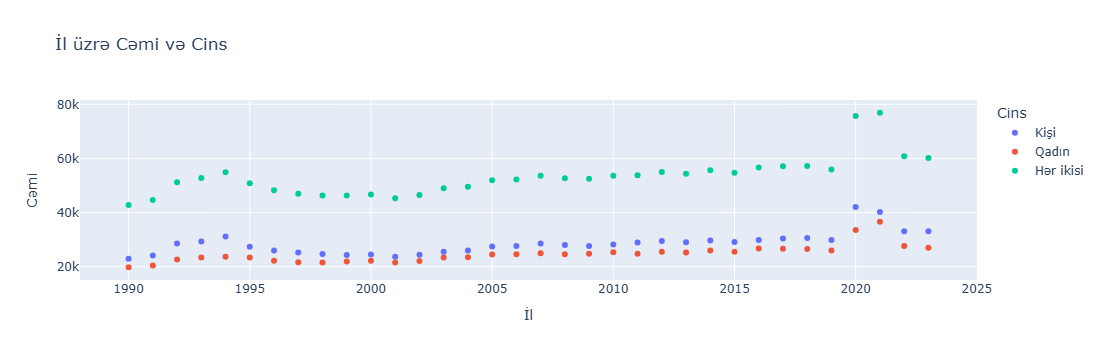

In [32]:
fig = px.scatter(data_frame=cins_yas_say_pro, 
                 x='İl', 
                 y='Cəmi', 
                 color='Cins', 
                 title='İl üzrə Cəmi və Cins')

fig.show()

### Analiz nəticələri(Ölüm Əmsalı)
Qrafikdən əldə edilən nəticələr Azərbaycanda ölüm əmsalının zamanla müəyyən dəyişikliklərə məruz qaldığını göstərir.
Ölüm sayı analizində görülən 1992 ildəki müharibədə olduğu kimi burada da görünür,1994 cü ildən sonra ölüm əmsalları azalmağa başlayıb bu da zaman 
keçdikcə tibb sahəsindəki inkişafı dəyərləndirdiyimizi göstərir,ümumiyyətlə kişilərin qadınlardan daha çox artımda olduğu bəllidir ümumdünya tendensiya 
da eyni ilə bu şəkildədir

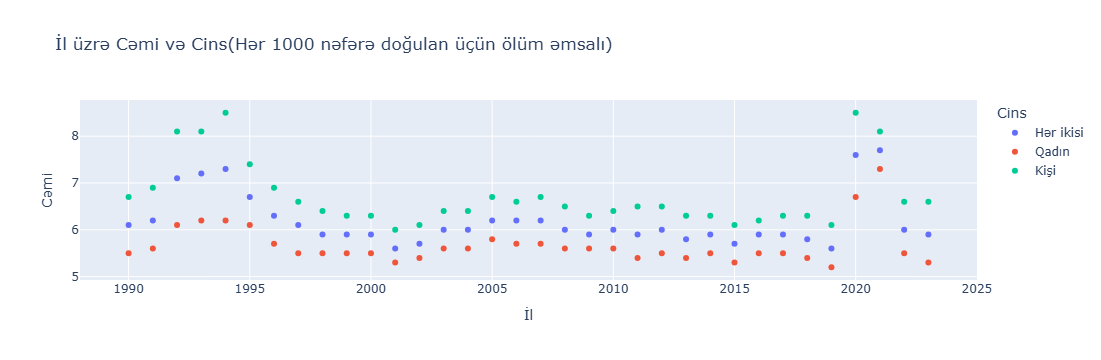

In [33]:
fig = px.scatter(data_frame=cins_yas_emsal_pro, 
                 x='İl', 
                 y='Cəmi', 
                 color='Cins', 
                 title='İl üzrə Cəmi və Cins(Hər 1000 nəfərə doğulan üçün ölüm əmsalı)')

fig.show()

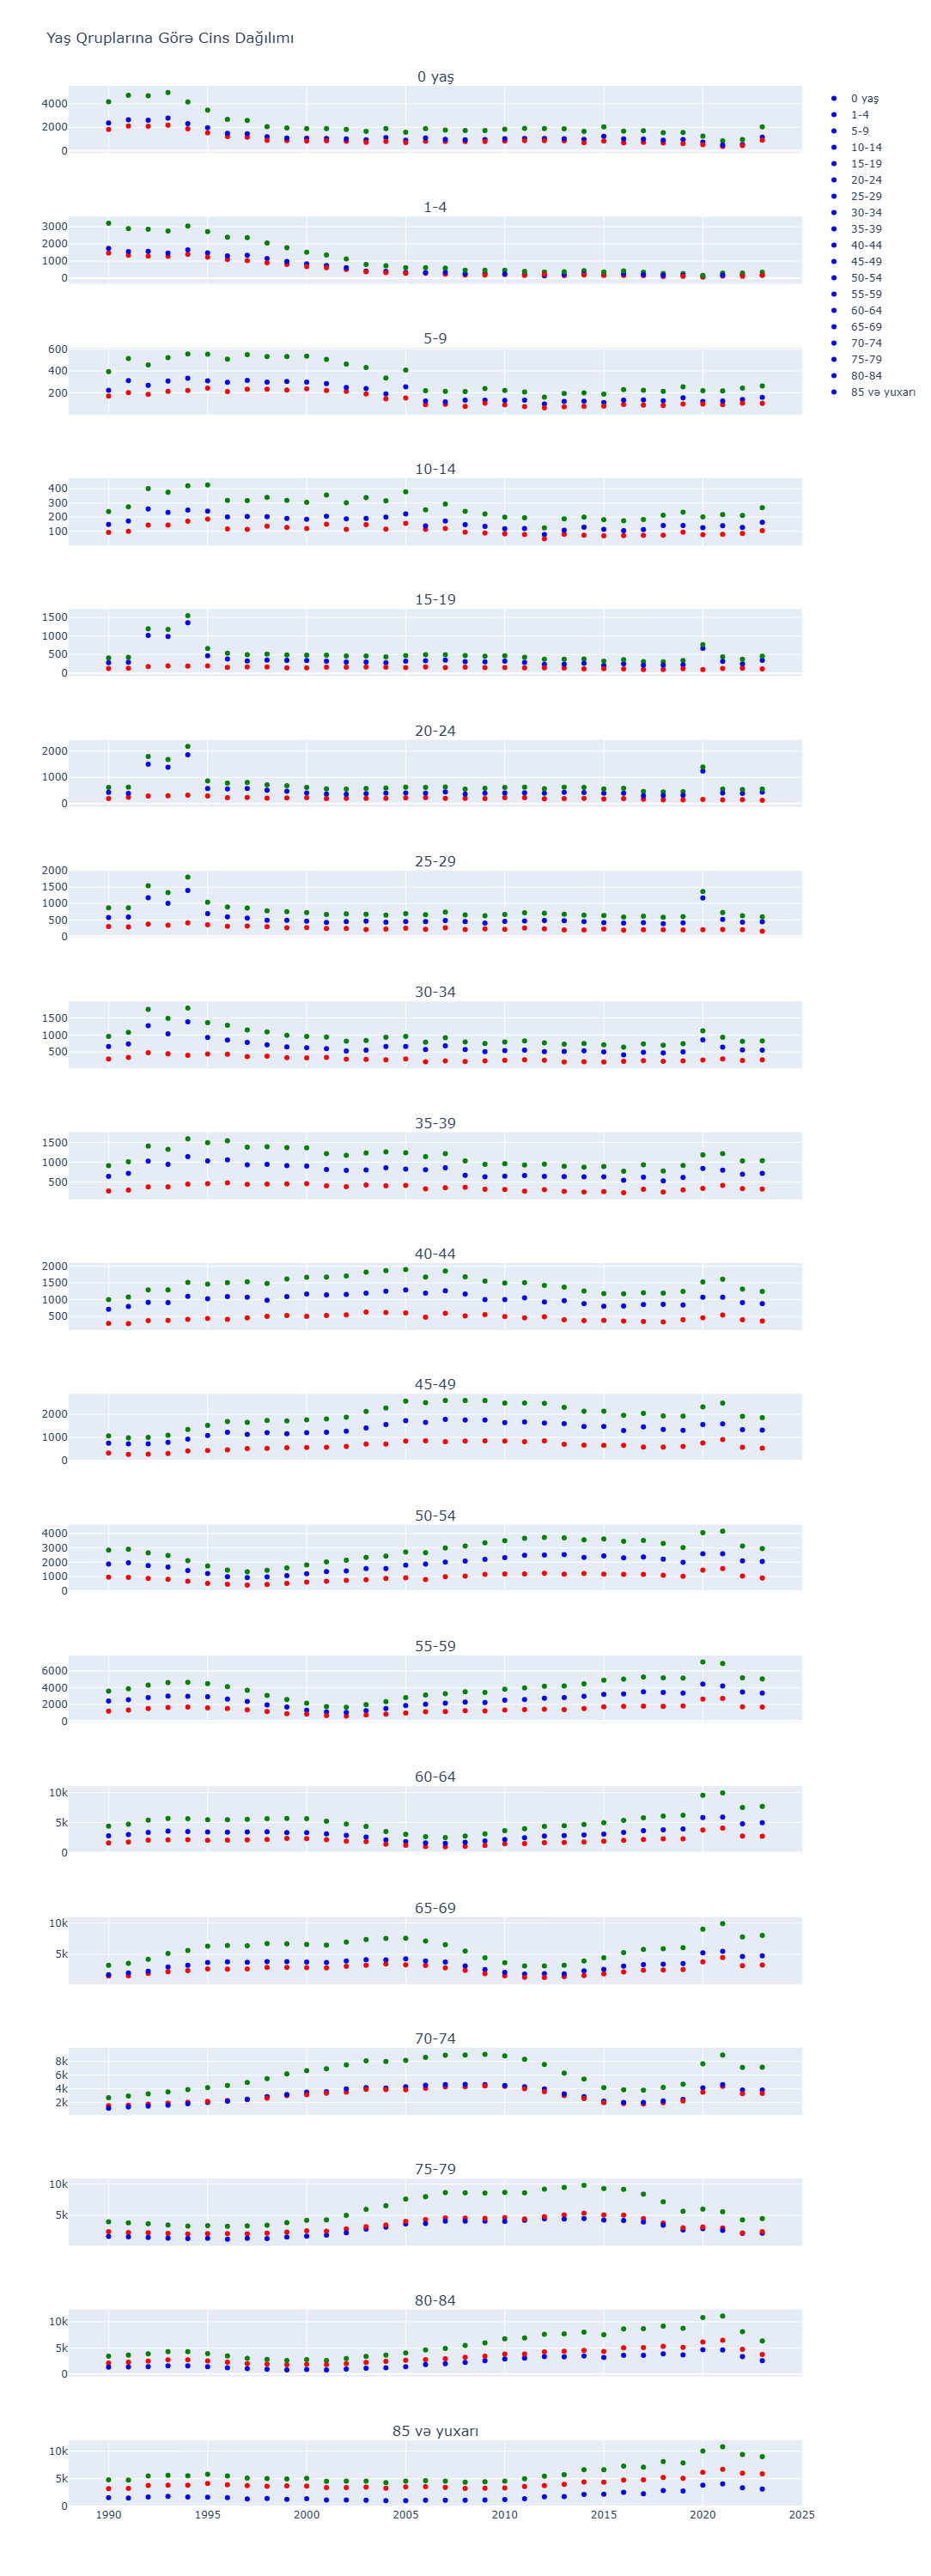

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Məsələn, cins dəyərlərinə uyğun rənglər
color_map = {
    'Kişi': 'blue',
    'Qadın': 'red',
    'Hər ikisi': 'green'
}

# Rənglər üçün yeni bir sütun yaradın
cins_yas_say_pro['Rəng'] = cins_yas_say_pro['Cins'].map(color_map)

fig = make_subplots(rows=19, cols=1, shared_xaxes=True, 
                    subplot_titles=('0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', '25-29', 
                                    '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                                    '60-64', '65-69', '70-74', '75-79', '80-84', '85 və yuxarı'))

# Hər bir yaş qrupu üçün scatter əlavə etmək
for i, age_group in enumerate(['0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', 
                               '25-29', '30-34', '35-39', '40-44', '45-49', 
                               '50-54', '55-59', '60-64', '65-69', '70-74', 
                               '75-79', '80-84', '85 və yuxarı']):
    fig.add_trace(go.Scatter(x=cins_yas_say_pro['İl'], 
                             y=cins_yas_say_pro[age_group], 
                             mode='markers', 
                             name=age_group, 
                             marker=dict(color=cins_yas_say_pro['Rəng'])),
                  row=i+1, col=1)

# Qrafiki göstərin
fig.update_layout(height=3000, width=800, title_text="Yaş Qruplarına Görə Cins Dağılımı")
fig.show()


# 2 ci sual

### Sual 2
Ölüm sayının yaş qrupları üzrə faiz nisbətinin illər üzrə dəyişməsini təsvir edin (son 20 
il). Müşahidə etdiyiniz əsas tendensiyaları göstərin və onların ehtimal oluna 
səbəblərini izah ed

#### Analiz nəticələri
Ümumiyətlə 90cı illərin sonlarına doğru görünür ki ,ölüm sayları azalmağa doğru gedir buda tibbin inkişafını göstərir
Körpə və uşaq ölümü azalma meylindədir və müsbət inkişafları göstərir.
Orta yaş qruplarında ölüm faizi sabitdir, lakin yaş artdıqca ölüm faizi yüksəlir.
COVID-19 pandemiyası 2020-ci ildə bütün yaş qruplarında ölüm faizini artırmışdır, xüsusən də yaşlı əhali arasında.in

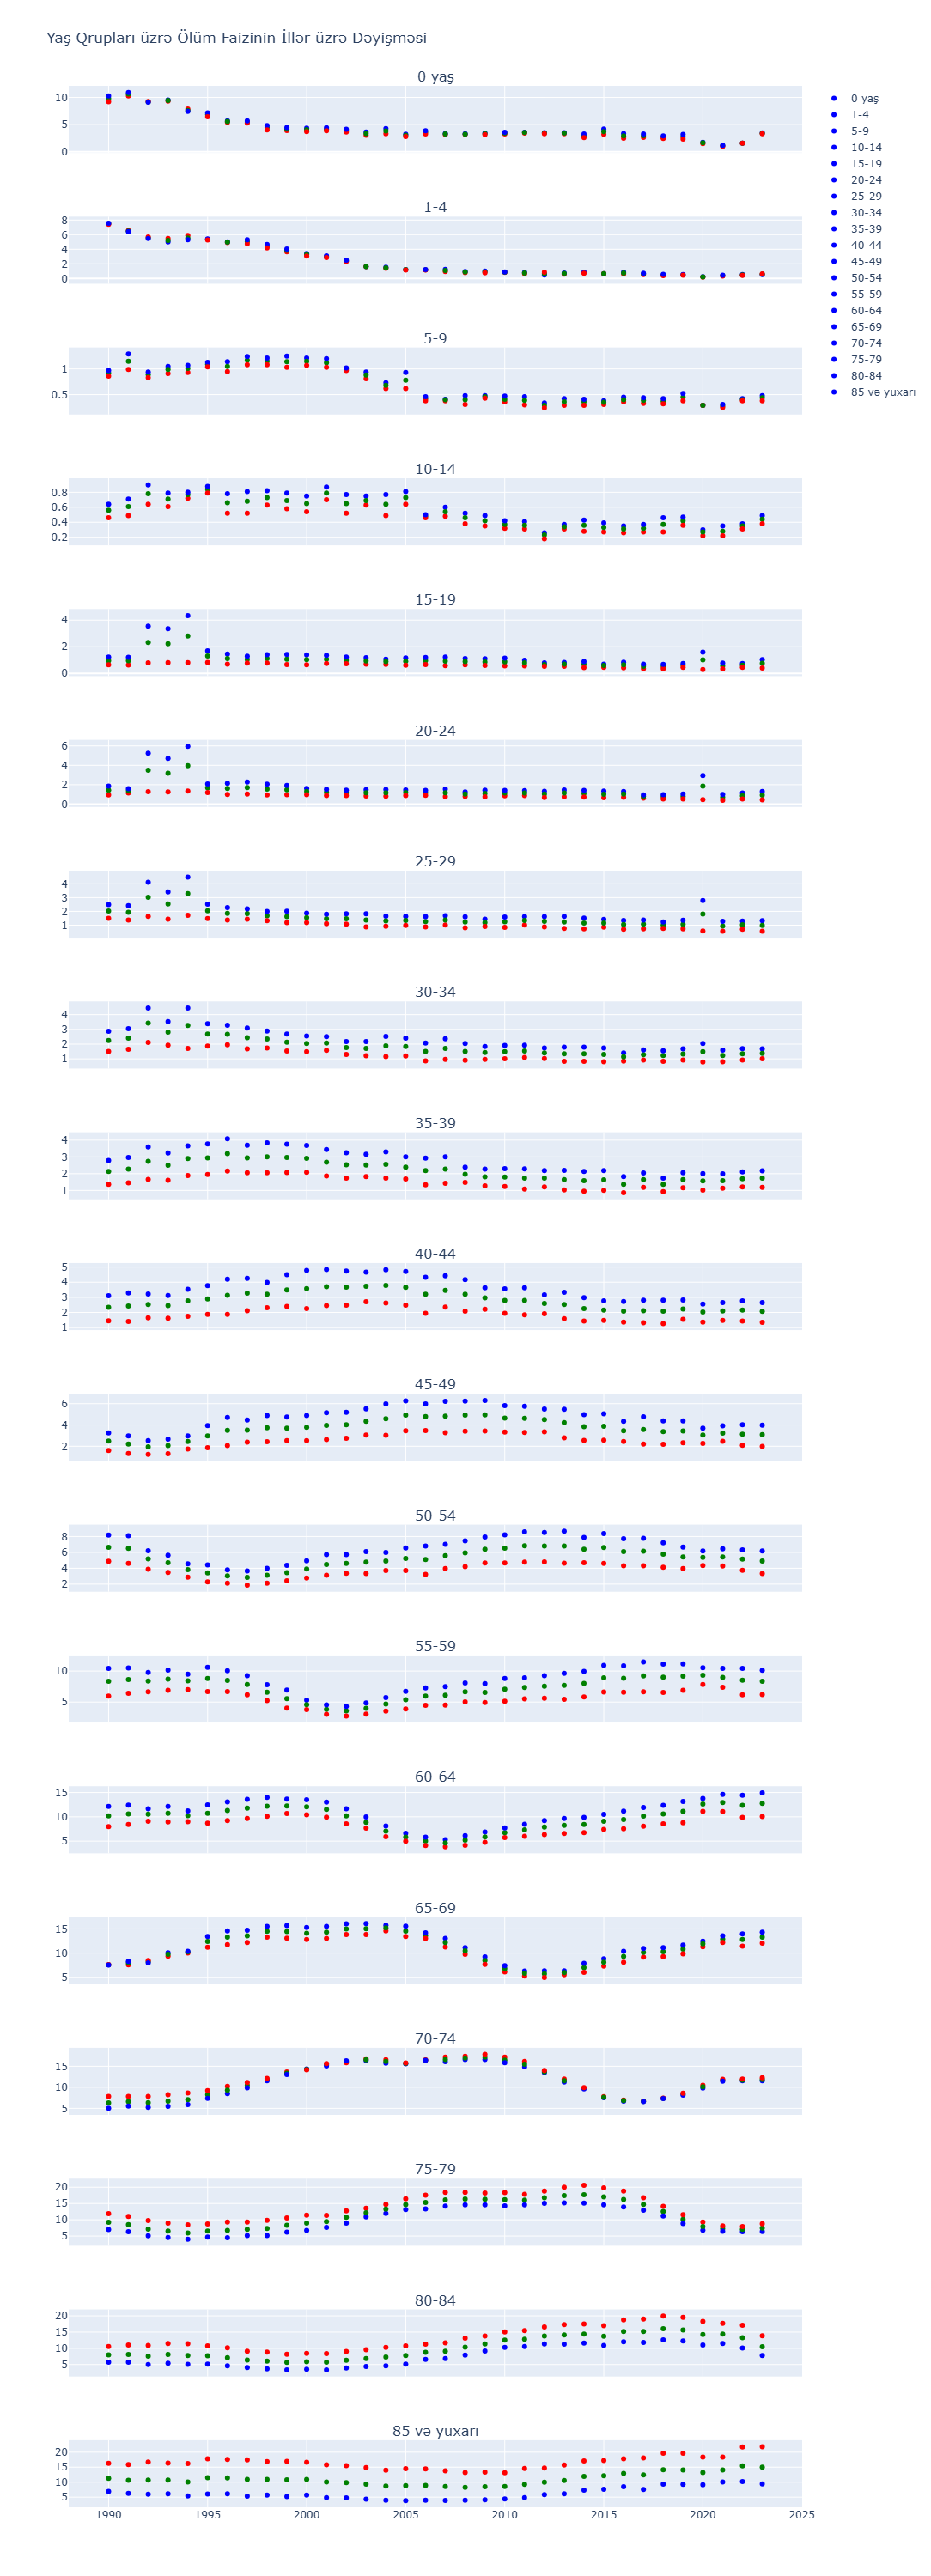

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Məsələn, cins dəyərlərinə uyğun rənglər
color_map = {
    'Kişi': 'blue',
    'Qadın': 'red',
    'Hər ikisi': 'green'
}

# Rənglər üçün yeni bir sütun yaradın
cins_yas_say_pro['Rəng'] = cins_yas_say_pro['Cins'].map(color_map)

# Yaş qrupları üzrə faizləri hesablayın və yuvarlayın
for age_group in ['0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', '25-29', 
                  '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', 
                  '60-64', '65-69', '70-74', '75-79', '80-84', '85 və yuxarı']:
    cins_yas_say_pro[f'{age_group} Faiz'] = round((cins_yas_say_pro[age_group] / cins_yas_say_pro['Cəmi']) * 100, 2)

# Subplotları yaradın
fig = make_subplots(rows=19, cols=1, shared_xaxes=True, 
                    subplot_titles=('0 yaş', '1-4', '5-9', '10-14', '15-19', '20-24', 
                                    '25-29', '30-34', '35-39', '40-44', 
                                    '45-49', '50-54', '55-59', '60-64', 
                                    '65-69', '70-74', '75-79', '80-84', 
                                    '85 və yuxarı'))

# Hər bir yaş qrupu üçün scatter əlavə etmək
for i, age_group in enumerate(['0 yaş','1-4', '5-9', '10-14', '15-19', '20-24', 
                               '25-29', '30-34', '35-39', '40-44', '45-49', 
                               '50-54', '55-59', '60-64', '65-69', '70-74', 
                               '75-79', '80-84', '85 və yuxarı']):
    fig.add_trace(go.Scatter(x=cins_yas_say_pro['İl'], 
                             y=cins_yas_say_pro[f'{age_group} Faiz'], 
                             mode='markers',  # Yalnız markerlər
                             name=age_group, 
                             marker=dict(color=cins_yas_say_pro['Rəng'])),
                  row=i+1, col=1)

# Qrafiki dizayn et
fig.update_layout(height=3000, width=800, title_text="Yaş Qrupları üzrə Ölüm Faizinin İllər üzrə Dəyişməsi")
fig.show()



# 3 cü sual

### Sual 3
Ölüm əmsalının yaş qrupları üzrə bölgüsündə kişi və qadın əhali üzrə müşahidə
olunan tendensiyaları müqayisəli təsvir edin. Bu müqayisəli təsvirdə nəzərə çarpa 
əsas məqamları göstərin və onları izah edin (yalnız 2022-ci il üzr

#### Analiz nəticələri
Yaş qrupları artdıqca kişi və qadın əhalisi üçün ölüm faizi yüksəlir.
Kişilər, xüsusilə yaşlı yaş qruplarında (80 və yuxarı) daha yüksək ölüm faizinə sahibdir.
Orta yaş və gənclik dövründə kişi və qadınlar arasında əhəmiyyətli fərqlər yoxdur, lakin yaşlandıqca kişilərin ölüm faizi qadınlara nisbətən daha yüksək olur. Bu fərq həyat tərzi, sağlamlıq riskləri və qadınların daha uzunömürlü olması ilə izah edilə bilər.);

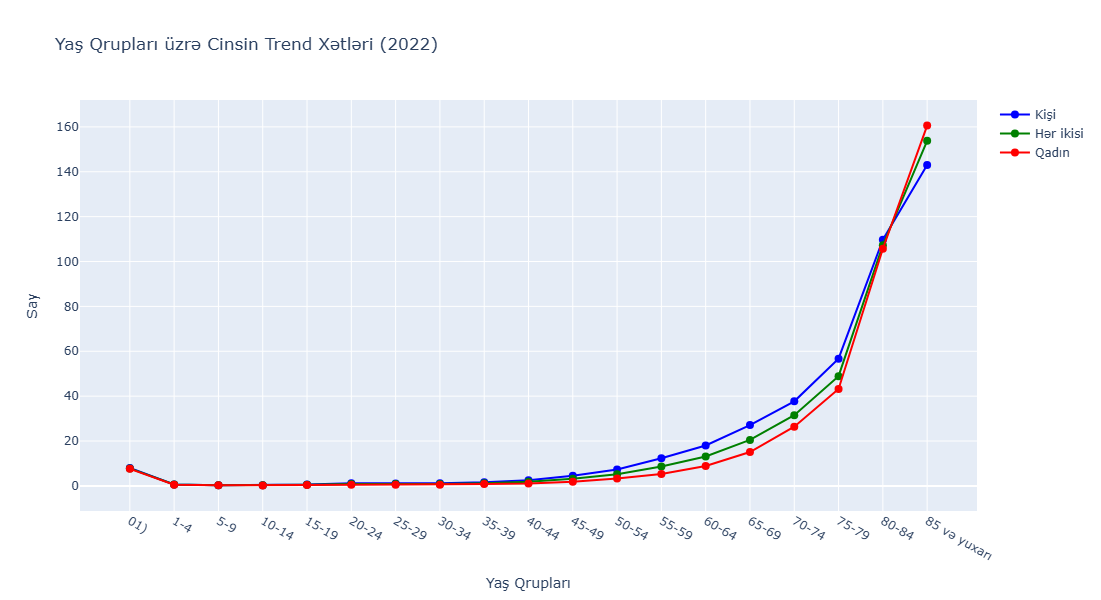

In [36]:
# 3cu task
import plotly.graph_objects as go
import pandas as pd

# Rəng mapası
color_map1 = {
    'Kişi': 'blue',
    'Qadın': 'red',
    'Hər ikisi': 'green'
}

# Rənglər üçün yeni bir sütun yaradın
cins_yas_emsal_pro['Rəng'] = cins_yas_emsal_pro['Cins'].map(color_map1)

# 2022 ilinə uyğun olan məlumatları seçin
data_2022 = cins_yas_emsal_pro[cins_yas_emsal_pro['İl'] == 2022]

# Yaş qruplarını müəyyən edin
age_groups = ['01)', '1-4', '5-9', '10-14', '15-19', '20-24', 
              '25-29', '30-34', '35-39', '40-44', '45-49', 
              '50-54', '55-59', '60-64', '65-69', '70-74', 
              '75-79', '80-84', '85 və yuxarı']

fig = go.Figure()

# Hər bir cins üçün trend xətti əlavə edin
for cins in data_2022['Cins'].unique():
    # Müvafiq cins üçün məlumatları seçin
    cins_data = data_2022[data_2022['Cins'] == cins]
    
    # X və Y dəyərlərini müəyyən edin
    y_values = [cins_data[age_group].values[0] if not cins_data[age_group].empty else 0 for age_group in age_groups]
    
    # Trend xətti əlavə edin
    fig.add_trace(go.Scatter(
        x=age_groups,
        y=y_values,
        mode='lines+markers',
        name=cins,
        line=dict(color=color_map1[cins]),
        marker=dict(size=8)
    ))

# Qrafiki göstərin
fig.update_layout(
    title_text="Yaş Qrupları üzrə Cinsin Trend Xətləri (2022)",
    xaxis_title="Yaş Qrupları",
    yaxis_title="Say",
    height=600,
    width=800
)

fig.show()


# 4 cu sual

### Sual 4
Ölüm əmsalının yaş qrupları üzrə bölgüsündə şəhər və kənd əhali üzrə müşahidə
olunan tendensiyaları müqayisəli təsvir edin. Bu qarşılıqlı təsvirdə nəzərə çarpan əsas
məqamları göstərin və onların izah edin (yalnız 2022-ci il üzrə
);
#### Analiz nəticələ
2022-ci il üçün şəhər və kənd əhalisinin ölüm əmsallarının yaş qrupları üzrə bölgüsü göstərir ki, yaş artdıqca hər iki qrupda da ölüm riski artmaqdadır. Lakin kənd yerlərində yaşlı əhali arasında ölüm əmsalının daha yüksək olması kənddə yaşayan insanların daha az səhiyyə imkanlarına malik olması ilə əlaqədar ola bilər. Bu nəticələr gələcək səhiyyə və sosial təminat proqramlarının planlaşdırılmasında nəzərə alınmalıdır.ri

In [37]:
# 2022-ci il üzrə məlumatları seçin
df5_pro_2022 = cins_yas_emsal_seher_pro[cins_yas_emsal_seher_pro['İl'] == 2022] #emsala gore olum kennde
df6_pro_2022 = cins_yas_emsal_kend_pro[cins_yas_emsal_kend_pro['İl'] == 2022]#emsala gore olum seherde

In [38]:
#4cu sual
import plotly.express as px

# Şəhər üçün məlumatlar (stack bar qrafiki)
city_melted = df5_pro_2022.melt(id_vars=['Cins', 'İl'], var_name='Yaş qrupu', value_name='Əmsal')
fig_city = px.bar(city_melted, x='İl', y='Əmsal', color='Cins', barmode='stack', 
                  facet_col='Yaş qrupu', title="Şəhər üzrə ölüm əmsalları (2022)", 
                  facet_col_spacing=0.02)  # Sütunlar arasındakı boşluğu azaldır

# 'Yaş qrupu' başlığını gizlətmək
fig_city.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Plotun ölçüsünü və yazıların ölçüsünü tənzimləyirik
fig_city.update_layout(height=700, width=1200, title_font_size=18, margin=dict(t=60))
fig_city.update_xaxes(tickangle=45, automargin=True)  # X oxundakı yazıların bucağını tənzimləmək
fig_city.update_yaxes(automargin=True)  # Y oxu üçün automargin
fig_city.update_layout(font=dict(size=10))  # Yazıların ölçüsünü kiçildirik
fig_city.show()

# Kənd üçün məlumatlar (stack bar qrafiki)
village_melted = df6_pro_2022.melt(id_vars=['Cins', 'İl'], var_name='Yaş qrupu', value_name='Əmsal')
fig_village = px.bar(village_melted, x='İl', y='Əmsal', color='Cins', barmode='stack', 
                     facet_col='Yaş qrupu', title="Kənd üzrə ölüm əmsalları (2022)", 
                     facet_col_spacing=0.02)  # Sütunlar arasındakı boşluğu azaldır

# 'Yaş qrupu' başlığını gizlətmək
fig_village.for_each_annotation(lambda a: a.update(text=a.text.split('=')[1]))

# Plotun ölçüsünü və yazıların ölçüsünü tənzimləyirik
fig_village.update_layout(height=700, width=1200, title_font_size=18, margin=dict(t=60))
fig_village.update_xaxes(tickangle=45, automargin=True)  # X oxundakı yazıların bucağını tənzimləmək
fig_village.update_yaxes(automargin=True)  # Y oxu üçün automargin
fig_village.update_layout(font=dict(size=10))  # Yazıların ölçüsünü kiçildirik
fig_village.show()


In [39]:
erazi_1_yas = pd.read_excel('004_9.xls')

In [40]:
erazi_1_yas.head(50)

Unnamed: 0  \
0   4.9. Azərbaycan Respublikasının iqtisadi rayon...   
1                                                 NaN   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                                 NaN   
9                                                 NaN   
10                                                NaN   
11                                                NaN   
12                                                NaN   
13                                                NaN   
14                                                NaN   
15                                                NaN   
16                                                NaN   
17                                                NaN   
18                                                NaN   
19                                                NaN   
20                                                NaN   
21                                                NaN   
22                                                NaN   
23                                                NaN   
24                                                NaN   
25                                                NaN   
26                                                NaN   
27                                                NaN   
28                                                NaN   
29                                                NaN   
30                                                NaN   
31                                                NaN   
32                                                NaN   
33                                                NaN   
34                                                NaN   
35                                                NaN   
36                                                NaN   
37                                                NaN   
38                                                NaN   
39                                                NaN   
40                                                NaN   
41                                                NaN   
42                                                NaN   
43                                                NaN   
44                                                NaN   
45                                                NaN   
46                                                NaN   
47                                                NaN   
48                                                NaN   
49                                                NaN   

                                           Unnamed: 1 Unnamed: 2  \
0                                                 NaN        NaN   
1                                                 NaN        NaN   
2   İqtisadi rayonların və inzibati ərazi vahidlər...      İllər   
3                                                 NaN        NaN   
4                                                 NaN        NaN   
5                             Azərbaycan Respublikası        NaN   
6                                                 NaN       2010   
7                                                 NaN       2011   
8                                                 NaN       2012   
9                                                 NaN       2013   
10                                                NaN       2014   
11                                                NaN       2015   
12                                                NaN       2016   
13                                                NaN       2017   
14                                                NaN       2018   
15                                             

In [41]:
 erazi_1_yas.drop(list(range(20)), inplace=True)

In [42]:
erazi_1_yas.head(50)


Unnamed: 0                           Unnamed: 1 Unnamed: 2 Unnamed: 3  \
20        NaN                   Bakı şəhəri - cəmi        NaN        NaN   
21        NaN                                  NaN       2010        648   
22        NaN                                  NaN       2011        697   
23        NaN                                  NaN       2012        784   
24        NaN                                  NaN       2013        791   
25        NaN                                  NaN       2014        698   
26        NaN                                  NaN       2015        787   
27        NaN                                  NaN       2016        517   
28        NaN                                  NaN       2017        499   
29        NaN                                  NaN       2018        443   
30        NaN                                  NaN       2019        433   
31        NaN                                  NaN       2020        343   
32        NaN                                  NaN       2021        177   
33        NaN                                  NaN       2022        171   
34        NaN                                  NaN       2023        530   
35        NaN  Naxçıvan Muxtar Respublikası - cəmi        NaN        NaN   
36        NaN                                  NaN       2010         13   
37        NaN                                  NaN       2011         10   
38        NaN                                  NaN       2012         10   
39        NaN                                  NaN       2013          9   
40        NaN                                  NaN       2014         10   
41        NaN                                  NaN       2015         10   
42        NaN                                  NaN       2016         10   
43        NaN                                  NaN       2017          9   
44        NaN                                  NaN       2018         12   
45        NaN                                  NaN       2019         16   
46        NaN                                  NaN       2020         18   
47        NaN                                  NaN       2021         20   
48        NaN                                  NaN       2022         19   
49        NaN                                  NaN       2023         29   
50        NaN                          o cümlədən:        NaN        NaN   
51        NaN                      Naxçıvan şəhəri        NaN        NaN   
52        NaN                                  NaN       2010          5   
53        NaN                                  NaN       2011          4   
54        NaN                                  NaN       2012          4   
55        NaN                                  NaN       2013          4   
56        NaN                                  NaN       2014          3   
57        NaN                                  NaN       2015          3   
58        NaN                                  NaN       2016          3   
59        NaN                                  NaN       2017          4   
60        NaN                                  NaN       2018          4   
61        NaN                                  NaN       2019          2   
62        NaN                                  NaN       2020          3   
63        NaN                                  NaN       2021          5   
64        NaN                                  NaN       2022          2   
65        NaN                                  NaN       2023          4   
66        NaN                         Babək rayonu        NaN        NaN   
67        NaN                                  NaN       2010          2   
68        NaN                                  NaN       2011          1   
69        NaN                                  NaN       2012          1   

   Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  
20        NaN        NaN        NaN        NaN        NaN  
21    

In [43]:
erazi_1_yas.drop('Unnamed: 0',axis=1,inplace=True)

In [44]:
erazi_1_yas_22 = erazi_1_yas[erazi_1_yas['Unnamed: 2'] == 2022]

In [45]:
erazi_1_yas_22['seher ve rayon'] = erazi_1_yas['Unnamed: 1'].shift(13)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\3739883557.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
erazi_1_yas_22.drop('Unnamed: 1',axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\332691151.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
erazi_1_yas_22

Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
33         2022        171        171          -        6.9        6.9   
48         2022         19         13          6        4.2        8.8   
64         2022          2          2          -        2.4        2.9   
79         2022          5          4          1        5.6        9.9   
94         2022          1          1          -        2.1        9.2   
...         ...        ...        ...        ...        ...        ...   
1291       2022          5          5          -        4.4        4.4   
1306       2022         14          2         12        8.5        6.2   
1321       2022         12          7          5       11.9       17.2   
1336       2022         10          4          6        9.7       10.3   
1351       2022         17          2         15        8.7        3.6   

     Unnamed: 8                       seher ve rayon  
33            -                   Bakı şəhəri - cəmi  
48            2  Naxçıvan Muxtar Respublikası - cəmi  
64            -                      Naxçıvan şəhəri  
79          2.1                         Babək rayonu  
94            -                         Culfa rayonu  
...         ...                                  ...  
1291          -                       Şirvan şəhəri   
1306        9.1                     Biləsuvar rayonu  
1321        8.4                     Hacıqabul rayonu  
1336        9.4                      Neftçala rayonu  
1351       10.8                        Salyan rayonu  

[88 rows x 8 columns]

In [48]:
erazi_1_yas_22.drop(columns = ['Unnamed: 2','Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\1283701366.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
erazi_1_yas_22.rename(columns = {'Unnamed: 3' : 'Say','Unnamed: 6' : 'Emsal'},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\3398817215.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
erazi_1_yas_22 = erazi_1_yas_22.reset_index(drop=True)

In [51]:
erazi_1_yas_22.head(50)

Say Emsal                          seher ve rayon
0   171   6.9                      Bakı şəhəri - cəmi
1    19   4.2     Naxçıvan Muxtar Respublikası - cəmi
2     2   2.4                         Naxçıvan şəhəri
3     5   5.6                            Babək rayonu
4     1   2.1                            Culfa rayonu
5     -     -                         Kəngərli rayonu
6     1   2.4                          Ordubad rayonu
7     2  10.4                          Sədərək rayonu
8     2   9.7                           Şahbuz rayonu
9     6   5.2                            Şərur rayonu
10   54   8.9     Abşeron-Xızı iqtisadi rayonu - cəmi
11   31   9.1                         Sumqayıt şəhəri
12   21   8.4                          Abşeron rayonu
13    2    10                             Xızı rayonu
14   61  12.6    Dağlıq Şirvan iqtisadi rayonu - cəmi
15   14  11.7                             Ağsu rayonu
16   10   8.5                        İsmayıllı rayonu
17    8   9.4                         Qobustan rayonu
18   29  17.8                           Şamaxı rayonu
19   62   9.7   Gəncə-Daşkəsən iqtisadi rayonu - cəmi
20   26     9                            Gəncə şəhəri
21    1    12                         Naftalan şəhəri
22    5  12.1                         Daşkəsən rayonu
23    8   5.9                         Goranboy rayonu
24    5   5.8                           Göygöl rayonu
25   17  20.7                            Samux rayonu
26   70   6.8          Qarabağ iqtisadi rayonu - cəmi
27    1  26.3                         Xankəndi şəhəri
28   11   6.1                         Ağcabədi rayonu
29   16   5.8                            Ağdam rayonu
30  ...   ...                           Ağdərə rayonu
31    6   2.7                            Bərdə rayonu
32   18  10.1                           Füzuli rayonu
33    -     -                           Xocalı rayonu
34    4  18.6                         Xocavənd rayonu
35    6  15.6                             Şuşa rayonu
36    8   8.6                           Tərtər rayonu
37   74   8.3      Qazax-Tovuz iqtisadi rayonu - cəmi
38    7   6.2                          Ağstafa rayonu
39   10   8.2                          Gədəbəy rayonu
40   22  17.6                            Qazax rayonu
41   18   6.3                           Şəmkir rayonu
42   17   6.8                            Tovuz rayonu
43   45   5.9      Quba-Xaçmaz iqtisadi rayonu - cəmi
44   17   6.8                           Xaçmaz rayonu
45   10     4                             Quba rayonu
46    8   6.1                            Qusar rayonu
47    3   5.5                          Siyəzən rayonu
48    7   9.3                           Şabran rayonu
49   92     7  Lənkəran-Astara iqtisadi rayonu - cəmi

In [52]:
erazi_1_yas_22 = erazi_1_yas_22.drop(erazi_1_yas_22[erazi_1_yas_22['seher ve rayon'].str.contains('cəmi', case=False)].index[1:])

In [53]:
erazi_1_yas_22 = erazi_1_yas_22.replace('-','0')
erazi_1_yas_22 = erazi_1_yas_22.replace('...','0')

In [54]:
erazi_1_yas_22['Say'] = erazi_1_yas_22['Say'].astype(int)
erazi_1_yas_22['Emsal'] = erazi_1_yas_22['Emsal'].astype(float)

In [55]:
erazi_1_yas_22.drop([12], inplace=True)

In [56]:
erazi_1_yas_2022 = erazi_1_yas_22.sort_values(by = ['Say'],ascending = False)

In [57]:
erazi_1_yas_2022

Say  Emsal      seher ve rayon
0   171    6.9  Bakı şəhəri - cəmi
11   31    9.1     Sumqayıt şəhəri
54   29   10.6      Masallı rayonu
18   29   17.8       Şamaxı rayonu
74   28   12.8         Şəki rayonu
..  ...    ...                 ...
27    1   26.3     Xankəndi şəhəri
21    1   12.0     Naftalan şəhəri
5     0    0.0     Kəngərli rayonu
33    0    0.0       Xocalı rayonu
30    0    0.0       Ağdərə rayonu

[74 rows x 3 columns]

### Sual 5(1 yaşadək)

#### Analiz nəticələri

In [58]:
px.bar(data_frame = erazi_1_yas_2022.head(5) ,x ='seher ve rayon',y = 'Say')

In [59]:
px.bar(data_frame = erazi_1_yas_2022.tail(5) ,x ='seher ve rayon',y = 'Say')

# 5-6 sual

In [60]:
sayi_2023 = pd.read_excel('004_11.xls')

In [61]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sayi_2023

Unnamed: 0                                         Unnamed: 1  \
0           NaN  4.11.   2023-cü ildə Azərbaycan Respublikasını...   
1           NaN                                            (nəfər)   
2           NaN                                                NaN   
3           NaN  İqtisadi rayonların və inzibati ərazi vahidlər...   
4           NaN                                                NaN   
5           NaN                    Azərbaycan Respublikası  - cəmi   
6           NaN                                                NaN   
7           NaN                                 Bakı şəhəri - cəmi   
8           NaN                                        o cümlədən:   
9           NaN                                    Binəqədi rayonu   
10          NaN                                       Xətai rayonu   
11          NaN                                       Xəzər rayonu   
12          NaN                                     Qaradağ rayonu   
13          NaN                                   Nərimanov rayonu   
14          NaN                                      Nəsimi rayonu   
15          NaN                                      Nizami rayonu   
16          NaN                                   Pirallahı rayonu   
17          NaN                                     Sabunçu rayonu   
18          NaN                                      Səbail rayonu   
19          NaN                                    Suraxanı rayonu   
20          NaN                                     Yasamal rayonu   
21          NaN                                                NaN   
22          NaN                Naxçıvan Muxtar Respublikası-  cəmi   
23          NaN                                        o cümlədən:   
24          NaN                                   Naxçıvan şəhəri    
25          NaN                                       Babək rayonu   
26          NaN                                       Culfa rayonu   
27          NaN                                    Kəngərli rayonu   
28          NaN                                     Ordubad rayonu   
29          NaN                                     Sədərək rayonu   
30          NaN                                      Şahbuz rayonu   
31          NaN                                       Şərur rayonu   
32          NaN                                                NaN   
33          NaN                Abşeron-Xızı iqtisadi rayonu - cəmi   
34          NaN                                        o cümlədən:   
35          NaN                                    Sumqayıt şəhəri   
36          NaN                                     Abşeron rayonu   
37          NaN                                        Xızı rayonu   
38          NaN                                                NaN   
39          NaN               Dağlıq Şirvan iqtisadi rayonu - cəmi   
40          NaN                                        o cümlədən:   
41          NaN                                        Ağsu rayonu   
42          NaN                                   İsmayıllı rayonu   
43          NaN                                    Qobustan rayonu   
44          NaN                                      Şamaxı rayonu   
45          NaN                                                NaN   
46          NaN              Gəncə-Daşkəsən iqtisadi rayonu - cəmi   
47          NaN                                        o cümlədən:   
48          NaN                                       Gəncə şəhəri   
49          NaN                                   Naftalan şəhəri    
50          NaN                                    Daşkəsən rayonu   
51          NaN                                    Goranboy rayonu   
52          NaN                                     Göygöl  rayonu   
53          NaN                                       Samux rayonu   
54          NaN                                                NaN   
55          NaN                     Qarabağ iqtisadi rayonu - cəmi   
56          NaN

In [62]:
sayi_2023.drop([0,1,2,3,6,8,21,23,32,34,38,40,45,47,54,56,67,69,75,77,83,85,92,94,102,104,109,111,118,120,126,128],inplace=True)

In [63]:
sayi_23 = sayi_2023[['Unnamed: 1','Unnamed: 3','Unnamed: 19','Unnamed: 20']]

In [64]:
sayi_23.rename(columns = {'Unnamed: 1' : 'seher ve rayon','Unnamed: 3':'Usaq','Unnamed: 19':'80-84','Unnamed: 20':'85+'},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\3444334889.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
sayi_23 = sayi_23.reset_index(drop=True)

In [66]:
sayi_23.drop(0,inplace=True)

In [67]:
sayi_23 = sayi_23.drop(sayi_23[sayi_23['seher ve rayon'].str.contains('cəmi', case=False)].index)

In [68]:
sayi_23['Ahil'] = sayi_23['80-84'] + sayi_23['85+']

sayi_23.drop(['80-84', '85+'], axis=1, inplace=True)

In [69]:
sayi_23 = sayi_23.replace('...','0')
sayi_23 = sayi_23.replace('......','0')

In [70]:
sayi_23['Usaq'] = sayi_23['Usaq'].astype(int)
sayi_23['Ahil'] = sayi_23['Ahil'].astype(int)

In [71]:
sayi_23 = sayi_23.reset_index(drop=True)

In [72]:
sayi_23

seher ve rayon  Usaq  Ahil
0     Binəqədi rayonu    60   396
1        Xətai rayonu    94   367
2        Xəzər rayonu    35   204
3      Qaradağ rayonu    34   124
4    Nərimanov rayonu    31   252
5       Nəsimi rayonu    42   340
6       Nizami rayonu    32   269
7    Pirallahı rayonu     1    23
8      Sabunçu rayonu    35   334
9       Səbail rayonu    21   160
10    Suraxanı rayonu    58   289
11     Yasamal rayonu   142   381
12   Naxçıvan şəhəri      5   101
13       Babək rayonu     7    90
14       Culfa rayonu     4    62
15    Kəngərli rayonu     7    45
16     Ordubad rayonu     3    98
17     Sədərək rayonu     4    35
18      Şahbuz rayonu     4    53
19       Şərur rayonu    13   113
20    Sumqayıt şəhəri    54   413
21     Abşeron rayonu    46   217
22        Xızı rayonu     5    20
23        Ağsu rayonu    23   134
24   İsmayıllı rayonu    16   206
25    Qobustan rayonu    14    85
26      Şamaxı rayonu    56   163
27       Gəncə şəhəri    80   454
28   Naftalan şəhəri      1     7
29    Daşkəsən rayonu    10    67
30    Goranboy rayonu    25   196
31     Göygöl  rayonu    14   142
32       Samux rayonu     8   121
33    Xankəndi şəhəri     1     5
34    Ağcabədi rayonu    34   175
35       Ağdam rayonu    34   336
36      Ağdərə rayonu     0     0
37       Bərdə rayonu    53   283
38      Füzuli rayonu    20   234
39      Xocalı rayonu     3    20
40    Xocavənd rayonu     1    21
41        Şuşa rayonu     5    36
42      Tərtər rayonu     8   160
43     Ağstafa rayonu    21   221
44     Gədəbəy rayonu    18   332
45       Qazax rayonu    26   237
46      Şəmkir rayonu    56   362
47       Tovuz rayonu    36   376
48      Xaçmaz rayonu    46   292
49        Quba rayonu    57   299
50       Qusar rayonu    14   196
51     Siyəzən rayonu    16    56
52      Şabran rayonu    10    81
53      Astara rayonu    34   177
54   Cəlilabad rayonu    58   264
55       Lerik rayonu    22   136
56    Lənkəran rayonu    95   328
57     Masallı rayonu    62   340
58    Yardımlı rayonu    21   105
59  Mingəçevir şəhəri    33   117
60       Ağdaş rayonu    25   167
61      Göyçay rayonu    29   190
62    Kürdəmir rayonu    43   192
63        Ucar rayonu    13   146
64      Yevlax rayonu    28   201
65      Zərdab rayonu    17   127
66    Beyləqan rayonu    26   178
67      İmişli rayonu    32   200
68      Saatlı rayonu    34   135
69   Sabirabad rayonu    49   227
70     Balakən rayonu    11   154
71         Qax rayonu    14   106
72      Qəbələ rayonu    30   147
73        Oğuz rayonu     8    79
74        Şəki rayonu    54   365
75    Zaqatala rayonu    27   229
76    Cəbrayıl rayonu    16   149
77    Kəlbəcər rayonu     8   158
78     Qubadlı rayonu    11    98
79       Laçın rayonu    16   150
80    Zəngilan rayonu    12    99
81      Şirvan şəhəri    33   106
82   Biləsuvar rayonu    33   143
83   Hacıqabul rayonu    18    96
84    Neftçala rayonu    11   154
85      Salyan rayonu    29   198

In [73]:
sayi_usaq_23 = sayi_23.sort_values(by = ['Usaq'],ascending = False)

In [74]:
sayi_ahil_23 = sayi_23.sort_values(by = ['Ahil'],ascending = False)

### Sual 5
Uşaq ölümünün ən çox (top 5) və an az (bottom 5) müşahidə olunduğu şəhər və
rayonları təsvir edin. Regional təhlildə ortaya çıxan əsas qanunauyğunluqları göstərin
və onların ehtimal olunan səbəblərini izah edin (yalnız 2022-ci il üzrə)
###Ən Çox 5
Uşaq ölümünün səbəbləri əhalinin sıxlığı və bu səbəbdən tibb müəssisələrinin çatışmazlığı ola bilər (Yasamal və Xətai rayonları Bakının mərkəzi rayonları olduğunu nəzərə alaraq)
Digər regionlarda isə səhiyyə xidmətlərinin səviyyə və keyfiyyətin az olması ilə əlaqədar ola bilər.
Məsələn, kənd rayonlarında səhiyyə imkanlarının məhdud olması uşaq ölüm nisbətini artıran faktorlardan biridir(Masallı və Lənkəran)

#### Ən Az 5
Uşaq ölümünün az olduğu şəhər və kəndlərin əsasən müharibə bölgələri olduğunu görə bilərik buda orada yaşayanəhalinin sayca ya az olmasından ya da heç olmamasından qaynaqlanırri

In [75]:
px.bar(data_frame = sayi_usaq_23.head(5) ,x ='seher ve rayon',y = 'Usaq')

In [76]:
px.bar(data_frame = sayi_usaq_23.tail(5) ,x ='seher ve rayon',y = 'Usaq')

### Sual 6
Ahıl yaşda ölümün ən çox (top 5) və an az (bottom 5) müşahidə olunduğu şəhər və
rayonları təsvir edin. Regional təhlildə ortaya çıxan əsas qanunauyğunluqları göstərin
və onların ehtimal olunan səbəblərini izah edin (yalnız 2022-ci il üzrə);
###Analiz nəticələri

Azərbaycanda ahıl yaşda ölüm nisbətləri bölgələr üzrə fərqlənir. Bu fərqlərin əsas səbəbləri sosial-iqtisadi, ətraf mühit və həyat tərzi amilləri ola bilər. Aşağı gəlirli insanların tibbi xidmətlərə çıxışının məhdud olması, siqaret və alkoqol kimi zərərli vərdişlərin geniş yayılması, eləcə də hava çirkliliyi və suyun keyfiyyəti kimi ekoloji faktorlar yaşlı əhalinin sağlamlığına mənfi təsir göstərir. Bölgələrarası bu fərqləri azaltmaq üçün səhiyyə xidmətlərinin əlçatanlığını artırmaq, maarifləndirmə kampaniyaları təşkil etmək və ekoloji problemləri həll etmək vacibdir. 5

In [77]:
px.bar(data_frame = sayi_ahil_23.head(5) ,x ='seher ve rayon',y = 'Ahil')

In [78]:
px.bar(data_frame = sayi_ahil_23.tail(5) ,x ='seher ve rayon',y = 'Ahil')

# 7ci sual

In [79]:
sebeb_olum = pd.read_excel('005_1-2.xls',sheet_name = '5.1.')

In [80]:
sebeb_olum

Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
0           NaN                5.1.  Səbəblər üzrə ölənlərin sayı         NaN   
1           NaN                                            (nəfər)        NaN   
2           NaN                                                NaN        NaN   
3           NaN                                      Əsas səbəblər       1990   
4           NaN                  Şəhər və kənd yerləri üzrə - cəmi        NaN   
5           NaN                   Bütün səbəblərdən ölənlərin sayı      42819   
6           NaN                                        o cümlədən:        NaN   
7           NaN       - bəzi infeksion və parazitar xəstəliklərdən       1896   
8           NaN                                 - yenitörəmələrdən       4805   
9           NaN  - qan və qanyaradıçı orqanların xəstəlikləri v...        236   
10          NaN  - endokrin sistemin xəstəlikləri, qidalanma və...        668   
11          NaN     - psixi pozuntular və davranış pozuntularından          4   
12          NaN                - sinir sisteminin xəstəliklərindən        643   
13          NaN          - qan dövranı sisteminin xəstəliklərindən      20728   
14          NaN                - tənəffüs sistemi xəstəliklərindən       5893   
15          NaN                 - həzm sisteminin xəstəliklərindən       1975   
16          NaN      - dəri və dərialtı toxumanın xəstəliklərindən          4   
17          NaN  - sümük-əzələ sisteminin və birləşdirici toxum...         17   
18          NaN      - sidik-cinsiyyət sisteminin xəstəliklərindən        682   
19          NaN             - hamiləlik, doğuş və zahılıq dövründə         17   
20          NaN    - perinatal dövrdə meydana çıxan bəzi hallardan        645   
21          NaN  - anadangəlmə anomaliyalar (inkişaf qüsurları)...        595   
22          NaN  - digər rubrikalarda təsnif olunmayan klinik v...        805   
23          NaN  - travmalar, zəhərlənmələr və xarici səbəbləri...       3206   
24          NaN                                - digər səbəblərdən          -   
25          NaN               Şəhər və kənd yerləri üzrə - kişilər        NaN   
26          NaN                   Bütün səbəblərdən ölənlərin sayı      22997   
27          NaN                                        o cümlədən:        NaN   
28          NaN       - bəzi infeksion və parazitar xəstəliklərdən       1170   
29          NaN                                 - yenitörəmələrdən       2821   
30          NaN  - qan və qanyaradıçı orqanların xəstəlikləri v...        121   
31          NaN  - endokrin sistemin xəstəlikləri, qidalanma və...        286   
32          NaN     - psixi pozuntular və davranış pozuntularından          2   
33          NaN                - sinir sisteminin xəstəliklərindən        376   
34          NaN          - qan dövranı sisteminin xəstəliklərindən       9981   
35          NaN                - tənəffüs sistemi xəstəliklərindən       3217   
36          NaN                 - həzm sisteminin xəstəliklərindən       1079   
37          NaN      - dəri və dərialtı toxumanın xəstəliklərindən          4   
38          NaN  - sümük-əzələ sisteminin və birləşdirici toxum...         12   
39          NaN      - sidik-cinsiyyət sisteminin xəstəliklərindən        381   
40          NaN             - hamiləlik, doğuş və zahılıq dövründə          -   
41          NaN    - perinatal dövrdə meydana çıxan bəzi hallardan        405   
42          NaN  - anadangəlmə anomaliyalar (inkişaf qüsurları)...        308   
43          NaN  - digər rubrikalarda təsnif olunmayan klinik v...        403   
44          NaN  - travmalar, zəhərlənmələr və xarici səbəbləri...       2431   
45          NaN                                - digər səbəblərdən          -   
46          NaN              Şəhər və kənd yerləri üzrə - qadınlar        NaN   
47          NaN                   Bütün səbəblərdən ölənlərin sayı      19822   
48          NaN                     

In [81]:
alpha = sebeb_olum.iloc[[3, 5,  7, 8, 12, 13, 14, 23]]

In [82]:
alpha


Unnamed: 0                                         Unnamed: 1 Unnamed: 2  \
3          NaN                                      Əsas səbəblər       1990   
5          NaN                   Bütün səbəblərdən ölənlərin sayı      42819   
7          NaN       - bəzi infeksion və parazitar xəstəliklərdən       1896   
8          NaN                                 - yenitörəmələrdən       4805   
12         NaN                - sinir sisteminin xəstəliklərindən        643   
13         NaN          - qan dövranı sisteminin xəstəliklərindən      20728   
14         NaN                - tənəffüs sistemi xəstəliklərindən       5893   
23         NaN  - travmalar, zəhərlənmələr və xarici səbəbləri...       3206   

   Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
3        1991       1992       1993       1994       1995       1996   
5       44659      51258      52809      54921      50828      48242   
7        1500       1643       1900       2131       2279       1933   
8        4813       5132       4932       5017       4761       4709   
12        771        840        873        886        867        913   
13      21978      23118      25016      24858      25767      24765   
14       6316       6735       7229       7301       6527       5742   
23       3321       7067       5906       7271       3524       2856   

   Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
3        1997        1998        1999        2000        2001        2002   
5       46962       46299       46295       46701       45284       46522   
7        1896        1726        1828        1574        1532        1402   
8        4811        4944        5214        5081        5455        5859   
12        959         903         880         793         931         814   
13      24163       24681       25181       26205       25267       26505   
14       5323        4631        4352        4207        3519        3196   
23       2652        2487        2195        2097        1978        1869   

   Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20  \
3         2003        2004        2005        2006        2007        2008   
5        49001       49568       51962       52248       53655       52710   
7         1294        1111        1102         908         995         899   
8         6248        6105        6381        6517        6650        6515   
12         941         549         621         525         603         980   
13       27960       28488       29392       29712       30355       31128   
14        3136        3208        3069        2860        3725        2851   
23        2097        2249        2698        2686        3007        2444   

   Unnamed: 21 Unnamed: 22 Unnamed: 23 Unnamed: 24 Unnamed: 25 Unnamed: 26  \
3         2009        2010        2011        2012        2013        2014   
5        52514       53580       53762       55017       54383       55648   
7          865        1013         875         580         597         472   
8         6910        6633        5999        5886        6383        6982   
12         687         789        1284        1338         985        1095   
13       32072       32554       32835       34832       34379       33291   
14        2309        2377        2185        1743        1529        1971   
23        2369        2529        2460        2467        2234        2827   

   Unnamed: 27 Unnamed: 28 Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32  \
3         2015        2016        2017        2018        2019        2020   
5        54697       56648       57109       57250       55916       75647   
7          510         564         814         755         662        5875   
8         7278        8252        8665        8718        8819        9879   
12        1047         822         960         864         848         740   
13       32825       34093       33663       33909       32471    

In [83]:
alpha.drop(columns = ['Unnamed: 0', 'Unnamed: 36', 'Unnamed: 37'],axis=1, inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\1764523733.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
alpha = alpha.set_index('Unnamed: 1').T

In [85]:
alpha

Unnamed: 1  Əsas səbəblər Bütün səbəblərdən ölənlərin sayı  \
Unnamed: 2           1990                            42819   
Unnamed: 3           1991                            44659   
Unnamed: 4           1992                            51258   
Unnamed: 5           1993                            52809   
Unnamed: 6           1994                            54921   
Unnamed: 7           1995                            50828   
Unnamed: 8           1996                            48242   
Unnamed: 9           1997                            46962   
Unnamed: 10          1998                            46299   
Unnamed: 11          1999                            46295   
Unnamed: 12          2000                            46701   
Unnamed: 13          2001                            45284   
Unnamed: 14          2002                            46522   
Unnamed: 15          2003                            49001   
Unnamed: 16          2004                            49568   
Unnamed: 17          2005                            51962   
Unnamed: 18          2006                            52248   
Unnamed: 19          2007                            53655   
Unnamed: 20          2008                            52710   
Unnamed: 21          2009                            52514   
Unnamed: 22          2010                            53580   
Unnamed: 23          2011                            53762   
Unnamed: 24          2012                            55017   
Unnamed: 25          2013                            54383   
Unnamed: 26          2014                            55648   
Unnamed: 27          2015                            54697   
Unnamed: 28          2016                            56648   
Unnamed: 29          2017                            57109   
Unnamed: 30          2018                            57250   
Unnamed: 31          2019                            55916   
Unnamed: 32          2020                            75647   
Unnamed: 33          2021                            76878   
Unnamed: 34          2022                            60810   
Unnamed: 35          2023                            60150   

Unnamed: 1  - bəzi infeksion və parazitar xəstəliklərdən - yenitörəmələrdən  \
Unnamed: 2                                          1896               4805   
Unnamed: 3                                          1500               4813   
Unnamed: 4                                          1643               5132   
Unnamed: 5                                          1900               4932   
Unnamed: 6                                          2131               5017   
Unnamed: 7                                          2279               4761   
Unnamed: 8                                          1933               4709   
Unnamed: 9                                          1896               4811   
Unnamed: 10                                         1726               4944   
Unnamed: 11                                         1828               5214   
Unnamed: 12                                         1574               5081   
Unnamed: 13                                         1532               5455   
Unnamed: 14                                         1402               5859   
Unnamed: 15                                         1294               6248   
Unnamed: 16                                         1111               6105   
Unnamed: 17                                         1102               6381   
Unnamed: 18                                          908               6517   
Unnamed: 19                                          995               6650   
Unnamed: 20                                          899               6515   
Unnamed: 21                                          865               6910   
Unnamed: 22                                         1013               6633   
Unnamed: 23                                          875               5999   
Unnamed: 24 

In [86]:
alpha = alpha.reset_index(drop=True)

In [87]:
alpha.rename(columns={'Əsas səbəblər': 'İl'}, inplace=True)


In [88]:
alpha

Unnamed: 1    İl Bütün səbəblərdən ölənlərin sayı  \
0           1990                            42819   
1           1991                            44659   
2           1992                            51258   
3           1993                            52809   
4           1994                            54921   
5           1995                            50828   
6           1996                            48242   
7           1997                            46962   
8           1998                            46299   
9           1999                            46295   
10          2000                            46701   
11          2001                            45284   
12          2002                            46522   
13          2003                            49001   
14          2004                            49568   
15          2005                            51962   
16          2006                            52248   
17          2007                            53655   
18          2008                            52710   
19          2009                            52514   
20          2010                            53580   
21          2011                            53762   
22          2012                            55017   
23          2013                            54383   
24          2014                            55648   
25          2015                            54697   
26          2016                            56648   
27          2017                            57109   
28          2018                            57250   
29          2019                            55916   
30          2020                            75647   
31          2021                            76878   
32          2022                            60810   
33          2023                            60150   

Unnamed: 1 - bəzi infeksion və parazitar xəstəliklərdən - yenitörəmələrdən  \
0                                                  1896               4805   
1                                                  1500               4813   
2                                                  1643               5132   
3                                                  1900               4932   
4                                                  2131               5017   
5                                                  2279               4761   
6                                                  1933               4709   
7                                                  1896               4811   
8                                                  1726               4944   
9                                                  1828               5214   
10                                                 1574               5081   
11                                                 1532               5455   
12                                                 1402               5859   
13                                                 1294               6248   
14                                                 1111               6105   
15                                                 1102               6381   
16                                                  908               6517   
17                                                  995               6650   
18                                                  899               6515   
19                                                  865               6910   
20                                                 1013               6633   
21                                                  875               5999   
22                                                  580               5886   
23                                                  597               6383   
24                                                  472               6982   
25                                                  510               7278   
26                                    

In [89]:
alpha.rename(columns = {'- bəzi infeksion və parazitar xəstəliklərdən' : 'infeksion_xestelikler', 
                             '- yenitörəmələrdən' : 'yenitoremeler',
                             '- sinir sisteminin xəstəliklərindən' : 'sinir_sistemi_xestelikleri',
                             ' - qan dövranı sisteminin xəstəliklərindən' : 'qan_dovrani_xestelilkleri', 
                             '- tənəffüs sistemi xəstəliklərindən' : 'teneffus_xestelikleri',
                             '- travmalar, zəhərlənmələr və xarici səbəblərin təsirinin digər nəticələrindən' : 'travma_zeherlenme',
                             'Bütün səbəblərdən ölənlərin sayı' : 'Cemi'},inplace=True)

In [90]:
alpha = alpha.astype(int)

### Sual 7 
Ölüm sayının ölümə səbəb olan əsas xəstəlik növləri üzrə faiz nisbətinin son 20 il
ərzində dəyişmə dinamikasını təsvir edin. Bu dinamikada əhəmiyyətli dəyişikliklər
olubmu? Müşahidə etdiyiniz əsas tendensiyaları göstərin və onların ehtimal olunan
səbəblərini izah edi#### Analiz nəticələri (Mənbə: Chatgpt)n


Əsas Tendensiyalar:

İnfeksion Xəstəliklər: İnfeksion xəstəliklərdən ölümlərdə əhəmiyyətli bir azalma müşahidə olunub ki, bu da ictimai sağlamlıq tədbirlərinin və vaksinasiya proqramlarının yaxşılaşması ilə əlaqəlidir.

Neoplazmalar (Xərçənglər): Xərçəng səbəbindən ölümlərdə davamlı artım qeydə alınıb, bu isə yaşlanan əhali və həyat tərzi dəyişiklikləri ilə bağlıdır.

Sinir Sistemi Xəstəlikləri: Sinir sistemi xəstəliklərindən ölümlər dalğalanmalar göstərir, bu da diaqnostika və müalicədəki irəliləyişlərdən təsirlənə bilər.

Kardiovaskulyar Xəstəliklər: Kardiovaskulyar xəstəliklər ölümlərin əsas səbəbləri arasında qalmaqdadır və stabil nisbətlər nümayiş etdirir, bu da hipertoniya və diabet kimi risk faktorlarına diqqət yetirilməsinin zəruriliyini göstərir.

Tənəffüs Xəstəlikləri: Tənəffüs xəstəliklərindən ölümlərdə azalma tendensiyası mövcuddur ki, bu da hava keyfiyyətinin yaxşılaşması və sağlamlıq məlumatlarının artması ilə bağlıdır.

Zədələr və Z отравленияlar: Zədələr və z отравленияlardan ölümlərdə azalma müşahidə olunmuşdur ki, bu da təhlükəsizlik tənzimləmələrinin gücləndirilməsi və ictimai məlumatlandırma kampaniyaları ilə əlaqədardır.

Nəticə: Bu tendensiyalar, ictimai sağlamlıq və səhiyyəyə çıxışdakı irəliləyişləri göstərsə də, xroniki xəstəliklərlə bağlı davam edən problemləri də ortaya qoyur. Gələcək səylər, hədəflənmiş sağlamlıq təşəbbüslərinə, həyat tərzi dəyişikliklərinə və səhiyyəyə çıxışın artırılmasına yönəlməlidir ki, ölüm nisbətlərini daha da azaltmaq mümkün olsun.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\3843514000.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\3843514000.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6528\3843514000.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

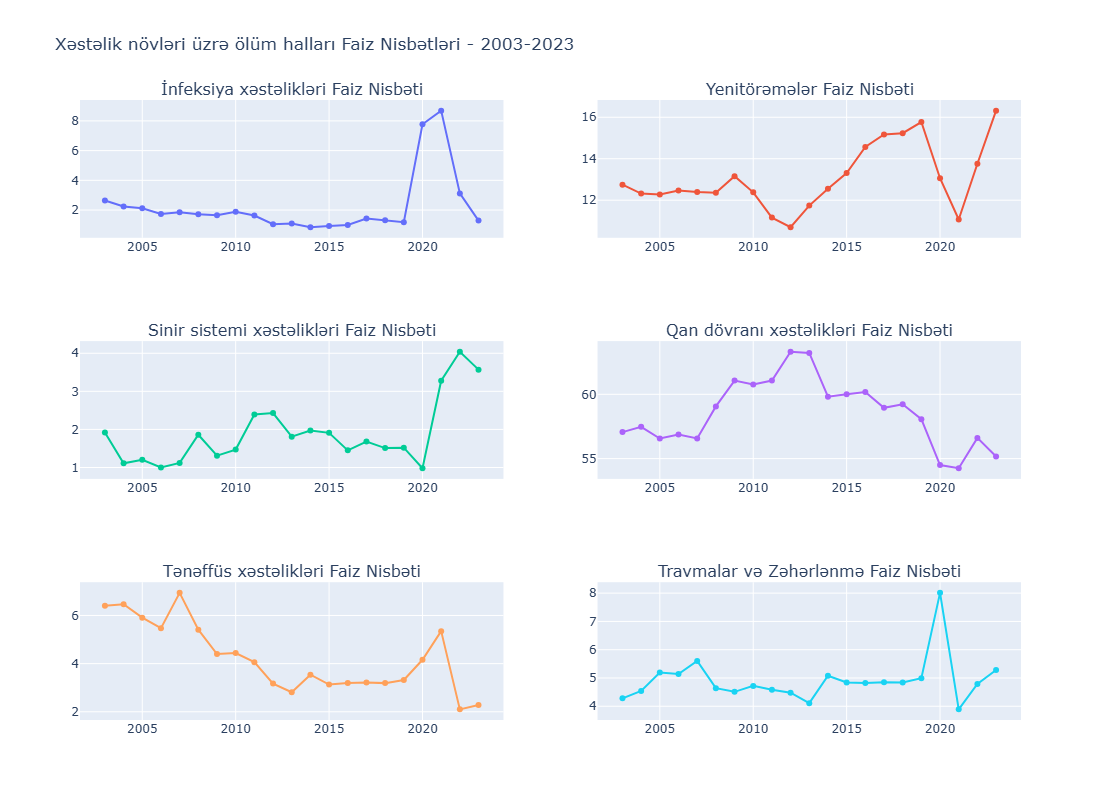

In [91]:

df_filtered = alpha[(alpha['İl'] >= 2003) & (alpha['İl'] <= 2023)]

df_filtered['infeksion_faiz'] = round((df_filtered['infeksion_xestelikler'] / df_filtered['Cemi']) * 100, 2)
df_filtered['yenitoremeler_faiz'] = round((df_filtered['yenitoremeler'] / df_filtered['Cemi']) * 100, 2)
df_filtered['sinir_sistemi_faiz'] = round((df_filtered['sinir_sistemi_xestelikleri'] / df_filtered['Cemi']) * 100, 2)
df_filtered['qan_dovrani_faiz'] = round((df_filtered['qan_dovrani_xestelilkleri'] / df_filtered['Cemi']) * 100, 2)
df_filtered['teneffus_faiz'] = round((df_filtered['teneffus_xestelikleri'] / df_filtered['Cemi']) * 100, 2)
df_filtered['travma_faiz'] = round((df_filtered['travma_zeherlenme'] / df_filtered['Cemi']) * 100, 2)

fig = make_subplots(rows=3, cols=2, subplot_titles=(
    'İnfeksiya xəstəlikləri Faiz Nisbəti', 'Yenitörəmələr Faiz Nisbəti',
    'Sinir sistemi xəstəlikləri Faiz Nisbəti', 'Qan dövranı xəstəlikləri Faiz Nisbəti',
    'Tənəffüs xəstəlikləri Faiz Nisbəti', 'Travmalar və Zəhərlənmə Faiz Nisbəti'))

fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['infeksion_faiz'], mode='lines+markers', name='İnfeksiya Faiz Nisbəti'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['yenitoremeler_faiz'], mode='lines+markers', name='Yenitörəmələr Faiz Nisbəti'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['sinir_sistemi_faiz'], mode='lines+markers', name='Sinir sistemi Faiz Nisbəti'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['qan_dovrani_faiz'], mode='lines+markers', name='Qan dövranı Faiz Nisbəti'), row=2, col=2)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['teneffus_faiz'], mode='lines+markers', name='Tənəffüs Faiz Nisbəti'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_filtered['İl'], y=df_filtered['travma_faiz'], mode='lines+markers', name='Travmalar Faiz Nisbəti'), row=3, col=2)

fig.update_layout(title_text="Xəstəlik növləri üzrə ölüm halları Faiz Nisbətləri - 2003-2023", height=800, showlegend=False)

fig.show()


# 8ci sual

In [92]:

omega = alpha.drop(['İl', 'Cemi'], axis=1)

for column in omega.columns:

    omega[f'{column}_faiz'] = round((omega[column] / alpha['Cemi']) * 100, 2)

omega

Unnamed: 1  infeksion_xestelikler  yenitoremeler  sinir_sistemi_xestelikleri  \
0                            1896           4805                         643   
1                            1500           4813                         771   
2                            1643           5132                         840   
3                            1900           4932                         873   
4                            2131           5017                         886   
5                            2279           4761                         867   
6                            1933           4709                         913   
7                            1896           4811                         959   
8                            1726           4944                         903   
9                            1828           5214                         880   
10                           1574           5081                         793   
11                           1532           5455                         931   
12                           1402           5859                         814   
13                           1294           6248                         941   
14                           1111           6105                         549   
15                           1102           6381                         621   
16                            908           6517                         525   
17                            995           6650                         603   
18                            899           6515                         980   
19                            865           6910                         687   
20                           1013           6633                         789   
21                            875           5999                        1284   
22                            580           5886                        1338   
23                            597           6383                         985   
24                            472           6982                        1095   
25                            510           7278                        1047   
26                            564           8252                         822   
27                            814           8665                         960   
28                            755           8718                         864   
29                            662           8819                         848   
30                           5875           9879                         740   
31                           6677           8509                        2520   
32                           1896           8369                        2455   
33                            778           9818                        2146   

Unnamed: 1  qan_dovrani_xestelilkleri  teneffus_xestelikleri  \
0                               20728                   5893   
1                               21978                   6316   
2                               23118                   6735   
3                               25016                   7229   
4                               24858                   7301   
5                               25767                   6527   
6                               24765                   5742   
7                               24163                   5323   
8                               24681                   4631   
9                               25181                   4352   
10                              26205                   4207   
11                              25267                   3519   
12                              26505                   3196   
13                              27960                   3136   
14                              28488                   3208   
15                              29392                   3069   
16                              29712                   2860   
17                              30355          